<h1>SVM Explained Mathematically by Ekki Rinaldi</h1>
<p>Diambil dari buku "Support Vector Machine Succinctly" oleh Alexandre KOWALCZYK</p>

<h2>1. Vektor</h2>
<p>Vektor adalah besaran yang memiliki besaran dan arah. Ditunjukkan pada gambar 1.1</p>

<img src="explainingsvm_images/vector1.png">
<p><center> **Gambar 1.1** </center> </p>

<p>Pada gambar 1.1, titik A berada pada koordinat (4,3) dapat gitulis sebagai:</p>
<img src="explainingsvm_images/vector1.2.png" width=100px>
<p>Vektor tersebut juga dapat disebut dengan variabel lain, misalkan **a**,</p>
<img src="explainingsvm_images/vector1.3.png" width=90px>
<p> Seperti yang dijelaskan diawal bahwa vektor memiliki besaran dan arah, artinya adalah:</p>
* Vektor memiliki panjang
* Sudut yang menentukan arah vektor

<h3>Menghitung besaran vektor</h3>
<p>Panjang dari sebuah vektor **x** ditulis sebagai **||x||** dan disebut sebagai **norm**
<img src="explainingsvm_images/vector1.4.png">
<p><center> **Gambar 1.2** Besaran vektor OA adalah panjang dari vektor tersebut </center> </p>
<p>Besaran ||OA|| dari vektor dapat dihitung dengan teorema pitagoras: </p>
<img src="explainingsvm_images/vector1.7.png">
<p>Secara umum, norm dari sebuah vektor dapat dirumuskan sbeagai berikut:
<img src="explainingsvm_images/vector1.8.png" width=200px>

<h3>Menghitung arah vektor</h3>
<p>Arah merupkana komponen kedua dari sebuah vektor. Singkatnya, arah merupakan vektor baru yang dihasilkan oleh koordinat awal dibagi dengan norm-nya</p>
<p>Arah dari sebuah vektor **u** = (*u*<sub>1</sub>,*u*<sub>2</sub>)
<img src="explainingsvm_images/vector1.9.png" width=150px>
<p>Gambar 1.3 menunjukkan vektor **u** yang terdiri dari sudut alpha terhadap garis vertikal dan theta terhadap garis horizontal.</p>
<img src="explainingsvm_images/vector1.10.png">
<p><center> **Gambar 1.3** Vektor **u** dan sudut yang menentukan arahnya </center> </p>
<p>Dengan menggunakan rumus geometri, dapat disimpulkan bahwa **w** :</p>
<img src="explainingsvm_images/vector1.11.png" width=250px>
<p>Koordinat **w** ditentukan dari nilai cosine, sehingga apabila salah satu nilai cosine berubah, maka nilai arah dari vektor **u** akan berubah, begitu juga dengan nilai **w**</p>
<p>Dimensi dari sebuah vektor bisa lebih dari dua dimensi, misalnya **u**= (5,4,7) merupakan vektor tiga dimensi.</p>

<h3>Dot Product</h3>
<p>Dot proudct dihasilkan oleh operasi dua vektor yang menghasilkan nilai skalar, sehingga dot product sering uga disebut sebagai *scalar product*. Ada dua tipe penjelasan mengenai dot product, yaitu secra geometris dan aljabar</p>

<h3>Dot Product (Geometris)</h3>
<p>Secara geometris, dot product adalah hasil besaran Euclidean dari dua vektor dan sudut cosine diantara keduanya.</p>
<img src="explainingsvm_images/vector1.12.png">
<p><center> **Gambar 1.4** Dua vektor **x** dan **y**</center> </p>
<p>Pada gambar 1.4, terdapat vektor **x** dan **y** dengan sudut θ, maka dot productnya adalah:</p>
<img src="explainingsvm_images/vector1.13.png" width=200px>
<p>Dengan melihat rumus diatas, maka dapat disimpulkan bahwa:</p>
<ul>
    <li>Ketika θ = 0  , maka *cos(θ)* = 1  dan **x.y** = ||x|| ||y||</li>
    <li>Ketika θ = 90 , maka *cos(θ)* = 0  dan **x.y** = 0</li>
    <li>Ketika θ = 180, maka *cos(θ)* = -1 dan **x.y** = - ||x|| ||y||</li>
</ul>
<p>Dot product dengan perhitungan geometris diimplmentasikan pada python dengan code dibawah</p>

In [5]:
import math
import numpy as np

def geometric_dot_product(x,y, theta):
    x_norm = np.linalg.norm(x)
    y_norm = np.linalg.norm(y)
    return x_norm * y_norm * math.cos(math.radians(theta))

theta = 45
x = [3,5]
y = [8,2]
print(geometric_dot_product(x,y,theta))

34.00000000000001


<h3>Dot Product (Aljabar)</h3>
<img src="explainingsvm_images/vector1.14.png">
<p><center> **Gambar 1.5** Penggunaan tiga sudut membuat perhitungan dot product lebih sederhana</center></p>
<p>Pada gambar 1.5, dapat dilihat hubungan antara tiga sudut β, α, dan θ:</p>
<img src="explainingsvm_images/vector1.15.png" width=100px>
<p>Ini berarti menghitung *cos(θ)* sama dengan menghitung *cos(β - α)*. Oleh karena itu untuk mendapatkan nilai cosine dapat dilakukan dengan rumus:</p>
<img src="explainingsvm_images/vector1.16.png" width=400px>
<p>Jika kedua sis dikalikan dengan ||x|| ||y||, maka:</p>
<img src="explainingsvm_images/vector1.17.png" width=300px>
<p>Sudah diketahui bahwa:</p>
<img src="explainingsvm_images/vector1.18.png" width=200px>
<p>Sehingga:</p>
<img src="explainingsvm_images/vector1.19.png" width=150px>
<p>Atau</p>
<img src="explainingsvm_images/vector1.20.png" width=150px>
<p>Secara umum, untuk n-dimensional vektor:</p>
<img src="explainingsvm_images/vector1.21.png" width=150px>
<p>Implementasi dot product secara aljabar pada python adalah sebagai berikut:</p>

In [7]:
def dot_product(x,y):
    result = 0
    for i in range(len(x)):
        result = result + x[i]*y[i]
    return result

x = [3,5]
y = [8,2]
print(dot_product(x,y))

34


<h2>2. Linear Separability</h2>
<h3>Menggunakan kadar alkohol untuk mengklasifikasi wine</h3>
<p>Terdapat dua jenis wine, wine murah dan wine mahal. Kedua jenis wine diambil beberapa botol sampel, dicatat, dan diukur kadar alkoholnya</p>
<img src="explainingsvm_images/vector2.1.png">
<p><center> **Gambar 2.1** Sampel beberapa botol pada dua jenis wine berdasarkan kadar alkoholnya.</center></p>
<p>Dapat dilihat bahwa anggur mahal memiliki kadar alkohol yang lebih sedikit. Dapat dilihat jelas bahwa semua titik-titik tersebut berkelompok menjadi dua grup, hal ini disebut dengan **linearly separable**. Jika kadar alkohol kurang dari 13% dapat dikatakan wine tersebut termasuk golongan wine mahal, dan juga sebaliknya.</p>
<p>Namun pada kenyataannya, jarang terjadi data yang benar-benar terpisah secara linear. Contoh data yang nonlinear ditunjukkan pada gambar 6.</p>

<img src="explainingsvm_images/vector2.2.png">
<p><center> **Gambar 2.2** Sampel wine di dunia nyata.</center></p>
<p>Untuk menyelesaikan permasalahan ini, salah satu caranya adalah menambahkan dimensi atau parameter seperti kadar keasaman, warna, dan massa jenis. Pemisah bagi kedua kelas memiliki bentuk yang berbeda-beda bergantung pada dimensi data yang ada:</p>
<ul>
    <li>Berbentuk titik pada satu dimensi **(Gambar 2.1)**</li>
    <li>Berbentuk garis pada dua dimensi **(Gambar 2.3)** </li>
    <li>Berbentuk bidang pada tiga dimensi **(Gambar 2.3)** </li>
</ul>
<img src="explainingsvm_images/vector2.3.png">
<p><center> **Gambar 2.3** Sampel data linear dua dimensi dan tiga dimensi.</center></p>
<p>Data nonlinear juga bisa terjadi pada data multidimensi, contohnya ada pada gambar 2.4. Untuk dapat memisahkan data tersebut, perlu pendekatan khusus pada classifiernya.</p>

<img src="explainingsvm_images/vector2.4.png">
<p><center> **Gambar 2.4** Sampel data nonlinear dua dimensi dan tiga dimensi.</center></p>

<h2>3. Hyperplanes</h2>
<p>Hyperplane digunakan untuk memisahkan data yang terdiri lebih dari tiga dimensi.</p>
<p>Pada matematika dasar, terdapat rumus *y = ax + b* untuk menentukan garis lurus dengan *a* sebagai *slope* dan *b* sebagai nilai awal *y*. Pada rumus ini, digunakan dua variabel yaitu *x* dan *y*.</p>
<p>Jika variabel tersebut diganti dengan *x<sub>1</sub>* dan *x<sub>2</sub>*, maka persamaan akan menjadi: *x<sub>2</sub>* = *ax<sub>1</sub> + *b* atau sama dengan *ax<sub>1</sub> + *b* - *x<sub>2</sub>* = 0. </p>
<p>Persamaan ini bila digunakan pada vektor dua dimensi dengan **x**=(*x<sub>1</sub>*,*x<sub>2</sub>*) dan **w** = (*a*, -1), kita akan mendapatkan persamaan baru (*w.x* adalah dot product dari *w* dan *x*):
<img src="explainingsvm_images/vector2.5.png" width=150/>
<p>Dari persamaan diatas, dapat disimpulkan bahwa hyperplane adalah sekumpulan titik (set of points) yang memenuhi persamaan **w.x** + *b* = 0</p>

<h3>Memahami Hyperplane</h3>
<p>Diberikan **w** = (*w*<sub>0</sub>,*w*<sub>1</sub>), **x** = (*x*,*y*) dan b, kita bisa menggunakan persamaan hyperplane:
<img src="explainingsvm_images/vector2.5.png" width=150/>
<p>Ini sama dengan:</p>
<img src="explainingsvm_images/vector2.6.png" width=150/>
<p>Dibagi dengan *w*<sub>1</sub> maka:</p>
<img src="explainingsvm_images/vector2.7.png" width=150/>
<p>Jika diganti dengan variabel *a* dan *c*:</p>
<img src="explainingsvm_images/vector2.8.png" width=200/>
<p>Sehingga kesimpulannya adalah bias *c* akan sama dengan *b* bila *w*<sub>1</sub> = -1, dan apabila *w*<sub>0</sub> dan *w*<sub>1</sub> memiliki simbol yang sama, maka slope *a* akan negatif.</p>

<h3>Klasifikasi menggunakan Hyperplane</h3>
<img src="explainingsvm_images/vector2.9.png"/>
<p><center> **Gambar 3.1** Sampel data linear dua dimensi.</center></p>
<p>Pada gambar diatas, data yang terdiri dari dua kelas terpisah secara linear. Sebagai contoh, apabila kita menggunakan vektor **w**=(0.4, 1.0) dan *b*=-9 maka akan didapat hyperlane sebagai berikut:</p>
<img src="explainingsvm_images/vector2.10.png"/>
<p><center> **Gambar 3.2** Contoh hyperplane pada data dua dimensi.</center></p>
<p>Kita hubungkan setiap vektor **x**<sub>i</sub> dengan label *y*<sub>i</sub> yang memiliki nilai -1 atau +1 sehingga fungsi *h*:</p>
<img src="explainingsvm_images/vector2.11.png" width=300px/>

<p>Sebagai contoh, untuk **x** = (8,7) bila dihitung maka **w.x** + *b*=0.4 x 8 + 1 x 7 - 9 = 1.2, yang berarti positif sehingga **x** berada diatas hyperlane dan memiliki kelas *h*(**x**)= +1</p>

<p>Contoh lain, untuk **x** = (1,3) bila dihitung maka **w.x** + *b*=0.4 x 1 + 1 x 3 - 9 = -5.6, yang berarti negatif sehingga **x** berada dibawah hyperlane dan memiliki kelas *h*(**x**)= -1</p>

<p>Karena hyperplane yang digunakan menggunakan rumus linear, maka fungsi *h* dapat disebut sebagai klasifikasi linear (linear classification)</p>

<p>Rumus dari *h* dapat disederhanakan lagi dengan menghilangkan konstanta *b* dan menambahkan *x*<sub>0</sub>=1 pada vektor **x**<sub>i</sub> yang nantinya disebut sebagai **x^**<sub>i</sub> (*x*<sub>i</sub> hat). Kemudian menambahkan **w**<sub>0</sub>=b pada vektor **w**<sub>i</sub> yang nantinya disebut sebagai **w^**<sub>i</sub> (*w*<sub>i</sub> hat). Kedua vektor modifikasi ini dikenal sebagai **augmented vector**</p>

<p>Dengan menggunakan *augmented vector*, fungsi hipotesis berubah menjadi</p>
<img src="explainingsvm_images/vector2.13.png" width=175px/>

<h3>Memahami cara membentuk hyperplane</h3>
<p>Perlu diingat bahwa satu-satunya nilai yang dapat merubah bentuk dari hyperplane adalah **w**. Pada kasus dua dimensi kita menggunakan tiga dimensi *augmented vector* sehingga didapat **x** = (*x*<sub>0</sub>,*x*<sub>1</sub>,*x*<sub>2</sub>) dan **w**=(*b*,*a*,-1). Dapat dilihat bahwa vektor **w** memiliki *b* dan *a* yang menjadi dua komponen utama penentu bentukan hyperlane. Dengan mengubah nilai **w**, maka bentuk hyperplane akan berubah.</p>
<img src="explainingsvm_images/vector2.12.png"/>
<p><center> **Gambar 3.3** Berbagai bentuk hyperplane yang pengaruhi oleh nilai **w**.</center></p>

<h3>Perceptron Learning Algorithm</h3>
<p>Diberikan data training *D* dengan m,n dimensi (**x**<sub>i</sub>,*y*<sub>i</sub>), **Perceptron Learning Algorithm** (PLA) berusaha mencari *h* sehingga dapat memprediksi label *y*<sub>i</sub> di setiap **x**<sub>i</sub> dengan benar.</p>

<p>Cara kerja PLA cukup sederhana:</p>
<ol>
    <li>Dimulai dengan sebuah hyperplane random (didefinisikan dengan vektor **w**) dan digunakan untuk mengklasifikasi data</li>
    <li>Ambil contoh yang salah diklasifikasikan dan pilih hyperplane lain dengan memperbarui nilai **w** (disebut **update rule**)</li>
    <li>Klasifikasikan data dengan hyperplane baru</li>
    <li>Ulangi langkah 2 dan 3 hingga tidak ada "missclassified"</li>
</ol>

In [77]:
import numpy as np
def perceptron_learning_algorithm(X, y):
    w = np.random.rand(3)
    misclassified_examples = predict(hypothesis, X, y, w)
    
    while misclassified_examples.any():
        x, expected_y = pick_one_from(misclassified_examples, X, y)
        w = w + x * expected_y # update rule
        misclassified_examples = predict(hypothesis, X, y, w)
    return w

<p>*perceptron_learning_algorithm* menggunakan beberapa fungsi. Fungsi *hypothesis* adalah *h(**x**)* yang mengembalikan nilai *y<sub>i</sub>* untuk setiap sampel **x**<sub>i</sub>. Fungsi *predict* digunakan untuk memprediksi setiap **x**<sub>i</sub> dan mengembalikan prediksi yang salah.</p>

In [11]:
def hypothesis(x, w):
    return np.sign(np.dot(w, x)) 

#Membuat prediksi terhadap semua data training dan mengembalikan yang salah.
def predict(hypothesis_function, X, y, w):
    predictions = np.apply_along_axis(hypothesis_function, 1, X, w)
    misclassified = X[y != predictions]
    return misclassified

<p>Setelah membuat prediksi dengan menggunakan fungsi *predict*, pilih salah satu data yang salah dengan menggunakan *pick_one_from* secara random.</p>

In [13]:
def pick_one_from(misclassified_examples, X, y):
    np.random.shuffle(misclassified_examples)
    x = misclassified_examples[0]
    index = np.where(np.all(X == x, axis=1))
    return x, y[index]

<p>Kode dibawah merupakan contoh dalam menggunakan *perceptron_learning_algorithm* function dengan data *dummy*.</p>

In [173]:
X = np.array([[8, 7], [4, 10], [9, 7], [7, 10], [9, 6], [4, 8], [10, 10],[2, 7], [8, 3], [7, 5], [4, 4], [4, 6], [1, 3], [2, 5]])
y = np.array([ 1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1])
# transform X into an array of augmented vectors.
X_augmented = np.c_[np.ones(X.shape[0]), X]
w = perceptron_learning_algorithm(X_augmented, y)
print(w)

[-12.57757234   0.41162949   1.54891726]


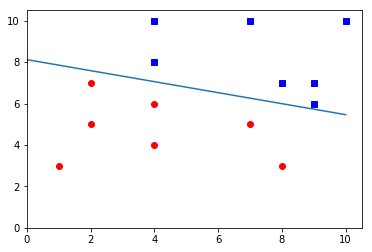

In [178]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)
y = -(w[1]*x+w[0])/w[2]

fig,ax = plt.subplots()
ax.plot([i[0] for i in X[:7]], [i[1] for i in X[:7]],'bs', [i[0] for i in X[7:]],
        [i[1] for i in X[7:]],'ro', x,y)
ax.axis([0,11,0,11])
ax.set_xlim((0.,10.5))
ax.set_ylim((0.,10.5))

plt.show()

<h3>Menghitung margin Hyperplane</h3>
<p>Pada gambar dibawah, terdapat dua kelas data yang dipisah oleh hyperplane</p>
<img src="explainingsvm_images/vector2.14.png"/>
<p>Dapat dilihat persamaan dari hyperplane adalah x<sub>2</sub>=−2x<sub>1</sub> atau sama dengan **w**<sup>T</sup>=0 dengan w(2,1) dan **x** (*x*<sup>1</sup>,*x*<sup>2</sup>)</p>
<p>Kita akan menghitung jarak titik A terhadap hyperplane, gambar dibawah menunjukkan proyeksi titik A terhadap hyperplane</p>
<img src="explainingsvm_images/vector2.15.png"/>
<p>Kita bisa melihat titik A terhadap **w**</p>
<img src="explainingsvm_images/vector2.16.png"/>
<p>Kita mendapatkan vektor P</p>
<img src="explainingsvm_images/vector2.17.png"/>
<p>Untuk menghitung jarak A terhadap hyperplane, kita mulai dari **w**=(2,1) dan **a**=(3,4) yang merupakan vektor dari A</p>
<img src="explainingsvm_images/vector2.18.png"/>
<p>Membuat vektor **u** sebagai arah dari **w**</p>
<img src="explainingsvm_images/vector2.19.png"/>
<p>**p** adalah proyeksi ortogonal **a** terhadap **w**, sehingga</p>
<img src="explainingsvm_images/vector2.20.png"/>
<p>Dengan mendapatkan nilai ||p|| antara A dengan Hyperplane, maka margin dapat dihitung dengan:</p>
<img src="explainingsvm_images/vector2.21.png"/>

<h3>Menghitung margin Hyperplane</h3>
<p>Perhatikan gambar dibawah, pada perhitungan sebelumnya kita telah mendapatkan margin M<sub>1</sub> dari hyperplane terhadap titik A.</p>
<img src="explainingsvm_images/vector2.22.png"/>
    
<p>Namun hyperplane ini masih kurang tepat, ada hyperplane dengan margin yang lebih besar, ditunjukkan oleh M<sub>2</sub></p>
<img src="explainingsvm_images/vector2.23.png"/>

<p>Cara menemukan margin terbesar dapat dilakukan dengan dua tahapan:</p>
<ol>
    <li>Dari sebuah dataset, cari dua hyperplane yang memisahkan data tanpa ada titik di dalamnya</li>
    <li>Maksimalkan jarak kedua hyperplane(margin)</li>
</ol>

<h3>Tahap pertama: Mencari hyperplane(s)</h3>
<p>Diberikan hyperplane H<sub>0</sub> yang memmisahkan data dan memenuhi **w⋅x**+b=0, selanjutnya kita dapat memilih dua hyperplane lain yang memenuhi persamaan</p>
<img src="explainingsvm_images/vector2.24.png"/>
<p>dan</p>
<img src="explainingsvm_images/vector2.25.png"/>
<p>Sekarang kita akan memilih hyperplane yang memenuhi dua **constraint**.</p>
<p>Untuk setiap vektor **x**<sub>i</sub>, memenuhi antara:</p>
<h4>**w⋅x**<sub>i</sub>+b ≥ 1 untuk **x**<sub>i</sub> yang memiliki kelas 1</h4>
<p>atau</p>
<h4>**w⋅x**<sub>i</sub>+b ≤ -1 untuk **x**<sub>i</sub> yang memiliki kelas -1</h4>
<p>Berikut contoh hyperplane dan penerapan constraint</p>
<img src="explainingsvm_images/vector2.26.png"/>
<img src="explainingsvm_images/vector2.27.png"/>
<img src="explainingsvm_images/vector2.28.png"/>
<img src="explainingsvm_images/vector2.29.png"/>
<img src="explainingsvm_images/vector2.30.png"/>


<h3>Tahap kedua: Memaksimalkan jarak antara hyperplane</h3>
<p>Untuk dapat memaksimalkan jarak antar hyperplane ada beberapa hal yang diperlukan</p>
<ol>
    <li>H<sub>0</sub> adalah hyperplane dengan persamaan **w⋅x**+b = −1</li>
    <li>H<sub>1</sub> adalah hyperplane dengan persamaan **w⋅x**+b = 1</li>
    <li>x<sub>0</sub> adalah titik in the hyperplane H0.</li>
</ol>
<img src="explainingsvm_images/vector3.1.png"/>
<p>Untuk mencari jarak antara dua hyperplane, dapat digunakan rumus sebagai berikut:</p>
<img src="explainingsvm_images/vector3.2.png"/>
<p>Berdasarkan rumus diatas, dapat disimpulkan bahwa semakin besar **w** (norm), maka margin akan semakin kecil. Sehingga memaksimalkan margin, sama halnya dengan mengecilkan **w**</p>
<p>Untuk materi selengkapnya dapat dilihat di <a href="https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/">link</a></p>
<p>To be explained</p>
<ol>
    <li>Kernel Trick</li>
    <li>Multiclass Classification</li>
</ol>